In [ ]:
#Importing Required Libraries

In [183]:
import glob
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Reading Call Quality dataset
# Creating new column headers considering haphazard column names in individual data

In [54]:

os.chdir(r'C:\Users\sushm\Downloads\Call Quality')
csv_files1 = [f for f in os.listdir() if f.endswith('.csv')]
df_call_qual = []

for csv in csv_files1:
    df1 = pd.read_csv(csv,header=None, 
                      names=['Operator','In_Out_Travelling','Network_Type','Rating','Call_Drop_Category','Latitude','Longitude','State_Name','Date'])
    df1=df1.iloc[1:]
    df_call_qual.append(df1)
    
final_df_call_qual = pd.concat(df_call_qual, ignore_index=True)
final_df_call_qual

,Operator,In_Out_Travelling,Network_Type,Rating,Call_Drop_Category,Latitude,Longitude,State_Name,Date
0,Vodafone,Outdoor,3G,5,Satisfactory,-1,-1,NaN,Apr-21
1,Vodafone,Travelling,3G,5,Satisfactory,-1,-1,NaN,Apr-21
2,Vodafone,Outdoor,2G,5,Satisfactory,-1,-1,NaN,Apr-21
3,Vodafone,Indoor,3G,5,Satisfactory,-1,-1,NaN,Apr-21
4,Vodafone,Travelling,3G,5,Satisfactory,-1,-1,NaN,Apr-21
...,...,...,...,...,...,...,...,...,...
90442,VI,Outdoor,4G,4,Satisfactory,-1,-1,NaN,Sep-21
90443,VI,Indoor,4G,4,Satisfactory,-1,-1,NaN,Sep-21
90444,VI,Indoor,4G,4,Satisfactory,-1,-1,NaN,Sep-21
90445,VI,Indoor,4G,5,Satisfactory,18.9856754,73.1310398,Maharashtra,Sep-21


In [55]:
#final_df_call_qual=final_df_call_qual.drop(index=0)
final_df_call_qual.dtypes

Operator              object
In_Out_Travelling     object
Network_Type          object
Rating                object
Call_Drop_Category    object
Latitude              object
Longitude             object
State_Name            object
Date                  object
dtype: object

In [ ]:
#Reading Call Speed dataset
# Creating new column headers considering haphazard column names in individual data

In [62]:
os.chdir(r'C:\Users\sushm\Downloads\Call Speed')
csv_files2 = [f for f in os.listdir() if f.endswith('.csv')]
df_call_speed = []

for csv in csv_files2:
    df2 = pd.read_csv(csv,header=None, 
                      names=['Operator','Technology','Download','Speed','Signal_Strength','lsa','Date'])
    df2=df2.iloc[1:]
    df_call_speed.append(df2)
    
final_df_call_speed = pd.concat(df_call_speed, ignore_index=True)
final_df_call_speed

C:\Users\sushm\AppData\Local\Temp\ipykernel_6316\2152234910.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv,header=None,
C:\Users\sushm\AppData\Local\Temp\ipykernel_6316\2152234910.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv,header=None,
C:\Users\sushm\AppData\Local\Temp\ipykernel_6316\2152234910.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv,header=None,
C:\Users\sushm\AppData\Local\Temp\ipykernel_6316\2152234910.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv,header=None,
C:\Users\sushm\AppData\Local\Temp\ipykernel_6316\2152234910.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_

,Operator,Technology,Download,Speed,Signal_Strength,lsa,Date
0,IDEA,4G,upload,19160,-81,Kerala,Apr-21
1,IDEA,4G,upload,8632,-85,Kerala,Apr-21
2,IDEA,4G,upload,0,-77,Kerala,Apr-21
3,IDEA,4G,upload,12708,-99,Kerala,Apr-21
4,JIO,4G,download,9426,-105,Chennai,Apr-21
...,...,...,...,...,...,...,...
4756013,Vi India,4G,download,9227,-110,NaN,Sep-21
4756014,Vi India,4G,download,387,-107,NaN,Sep-21
4756015,Vi India,4G,download,1532,-100,NaN,Sep-21
4756016,Vi India,4G,download,12495,-102,NaN,Sep-21


In [ ]:
#Attempting to merge data

In [32]:
#merged_df=pd.merge(final_df_call_speed, final_df_call_qual, how='left',left_on = ['Operator','lsa','Date'], right_on=['Operator','State_Name','Date'] )

In [38]:
#merged_df

In [39]:
#merged_df.isnull().sum()*100/merged_df.shape[0]

In [37]:
#Merged Data does not make sense at data level

In [ ]:
#Running EDA on Call Quality and Call Speed Data individually

In [65]:
final_df_call_qual.isnull().sum()*100/final_df_call_qual.shape[0]

Operator               0.000000
In_Out_Travelling      0.000000
Network_Type           0.000000
Rating                 0.000000
Call_Drop_Category     0.000000
Latitude               0.000000
Longitude              0.000000
State_Name            40.485588
Date                   0.000000
dtype: float64

In [67]:
final_df_call_qual['State_Name'].value_counts()

State_Name
Maharashtra                                 11199
Madhya Pradesh                              10609
Chhattisgarh                                 5239
Uttar Pradesh                                3410
Karnataka                                    3177
Kerala                                       2963
West Bengal                                  2838
Gujarat                                      2198
Delhi                                        1561
Rajasthan                                    1273
Himachal Pradesh                             1193
Tamil Nadu                                   1142
Andhra Pradesh                               1127
Punjab                                        985
Assam                                         857
Telangana                                     792
Jharkhand                                     609
Haryana                                       576
Meghalaya                                     426
Bihar                                  

In [130]:
final_df_call_qual.loc[final_df_call_qual['State_Name'].str.contains("NA")]

,Operator,In_Out_Travelling,Network_Type,Rating,Call_Drop_Category,Latitude,Longitude,State_Name,Date
62,Idea,Indoor,Unknown,2,Call Dropped,-1,-1,NA,Apr-21
202,Vodafone,Indoor,4G,4,Satisfactory,-1,-1,NA,Apr-21
234,Vodafone,Outdoor,4G,5,Satisfactory,-1,-1,NA,Apr-21
241,Vodafone,Indoor,4G,4,Satisfactory,-1,-1,NA,Apr-21
270,Airtel,Indoor,4G,5,Satisfactory,-1,-1,NA,Apr-21
...,...,...,...,...,...,...,...,...,...
90051,Airtel,Indoor,2G,5,Satisfactory,-1,-1,NA,Sep-21
90054,VI,Indoor,4G,4,Satisfactory,-1,-1,NA,Sep-21
90088,Airtel,Indoor,4G,1,Poor Voice Quality,-1,-1,NA,Sep-21
90166,VI,Indoor,4G,4,Satisfactory,-1,-1,NA,Sep-21


In [133]:

#I am using Random Sampling to fill missing values here
# As this is a labelled variable I can also use Mode or maximum occurence however that could be a little biased hence Random Sampling
## Not using any complicated K Means or KNN Clustering because of deadline

col_qual_miss = 'State_Name'

miss_indices_1 = final_df_call_qual[final_df_call_qual[col_qual_miss].isnull()].index
unique_cat_1 = final_df_call_qual[col_qual_miss].unique()
final_df_call_qual.loc[miss_indices_1,col_qual_miss] = np.random.choice(unique_cat_1, len(miss_indices_1))

#final_df_call_qual['State_Name']=final_df_call_qual['State_Name'].dropna()
final_df_call_qual=final_df_call_qual[~final_df_call_qual['State_Name'].str.contains("NA")]

final_df_call_qual['State_Name'].value_counts()
final_df_call_qual['State_Name'].isnull().sum()




0

In [68]:
final_df_call_speed.isnull().sum()*100/final_df_call_speed.shape[0]

Operator            0.000000
Technology          0.000000
Download            0.000000
Speed              23.171842
Signal_Strength     6.142302
lsa                20.838083
Date                0.000000
dtype: float64

In [118]:
final_df_call_speed['lsa'].value_counts()


lsa
Maharashtra         395174
Kerala              375628
UP East             342561
Andhra Pradesh      306455
Tamil Nadu          240724
UP West             226483
Rajasthan           214530
Gujarat             214279
Karnataka           189073
Madhya Pradesh      180257
Delhi               178475
Bihar               152399
Orissa              119332
Punjab              115386
Kolkata             104603
Mumbai              100661
West Bengal          88822
Chennai              66851
Haryana              56568
Assam                37084
Himachal Pradesh     27906
Jammu & Kashmir      21876
North East            9828
Name: count, dtype: int64

In [135]:
col_speed_miss = 'lsa'

miss_indices_2 = final_df_call_speed[final_df_call_speed[col_speed_miss].isnull()].index
unique_cat_2 = final_df_call_speed[col_speed_miss].unique()
final_df_call_speed.loc[miss_indices_2,col_speed_miss] = np.random.choice(unique_cat_2, len(miss_indices_2))

final_df_call_speed['lsa']=final_df_call_speed['lsa'].dropna()
#final_df_call_speed=final_df_call_qual[~final_df_call_speed['lsa'].str.contains("NA")]

final_df_call_speed['lsa'].value_counts()
final_df_call_speed['lsa'].isnull().sum()

1736

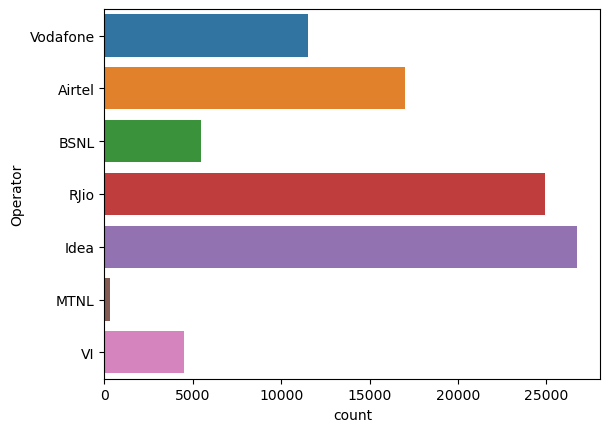

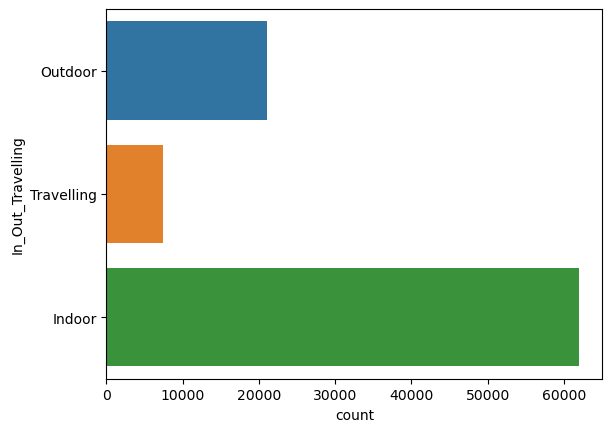

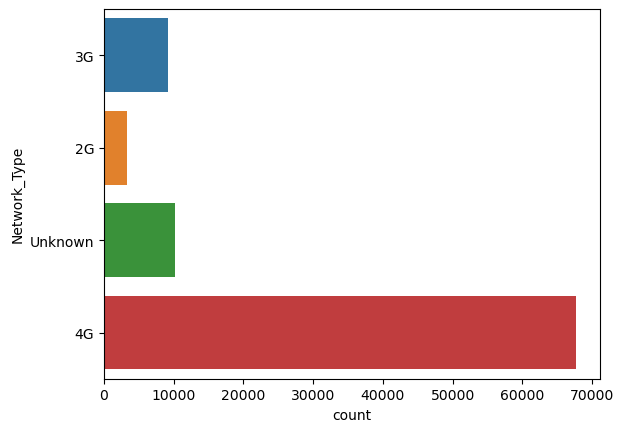

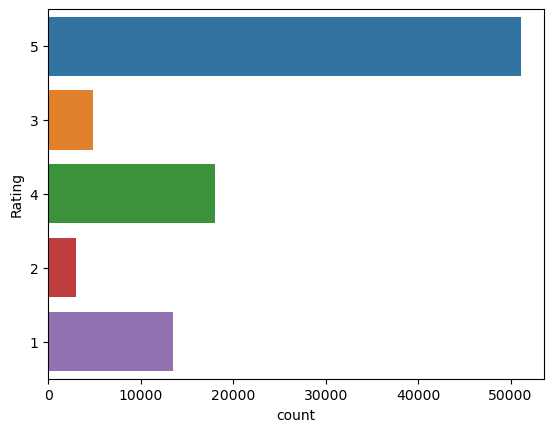

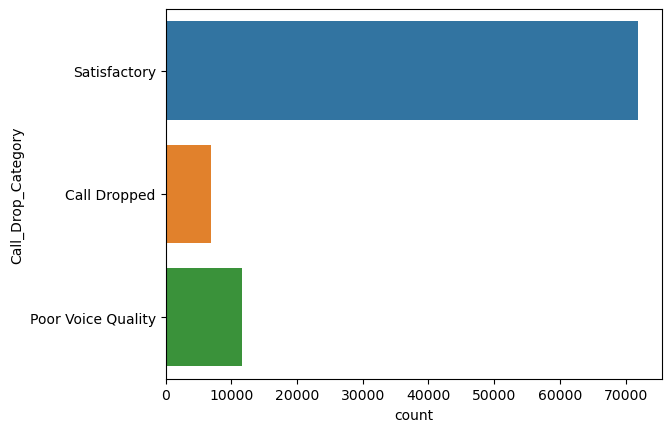

In [93]:
for column in final_df_call_qual.select_dtypes(include='object'):
    if final_df_call_qual[column].nunique() < 10:
        sns.countplot(y=column, data=final_df_call_qual)
        plt.show()

In [109]:
final_df_call_speed['Speed']=final_df_call_speed['Speed'].astype(float)
final_df_call_speed.dtypes


Operator            object
Technology          object
Download            object
Speed              float64
Signal_Strength     object
lsa                 object
Date                object
dtype: object

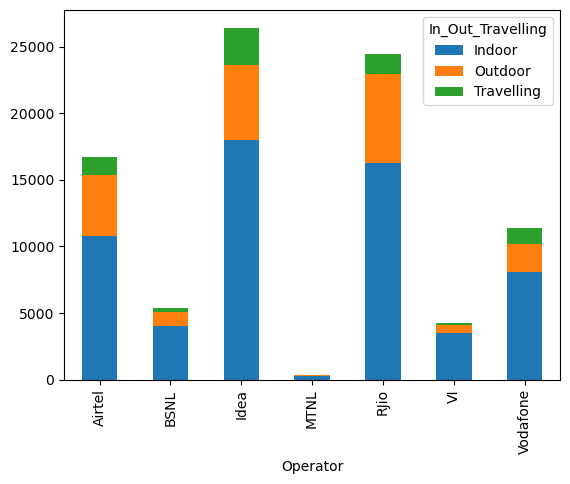

In [187]:
## Stacked Bar Chart to find relationship between categorical variables
pd.crosstab(final_df_call_qual['Operator'], final_df_call_qual['In_Out_Travelling']).plot(kind='bar', stacked=True)
plt.show()


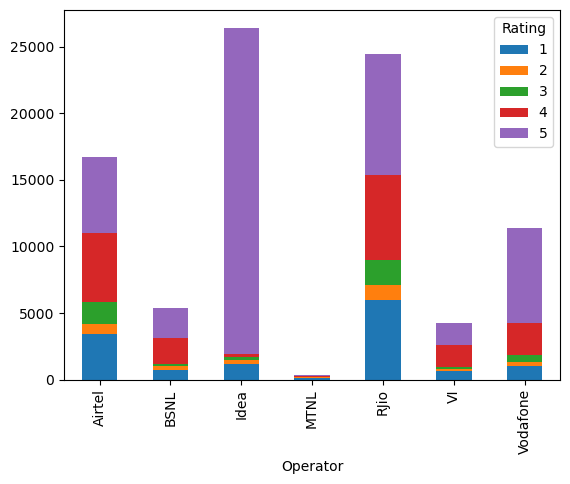

In [188]:
pd.crosstab(final_df_call_qual['Operator'], final_df_call_qual['Rating']).plot(kind='bar', stacked=True)
plt.show()

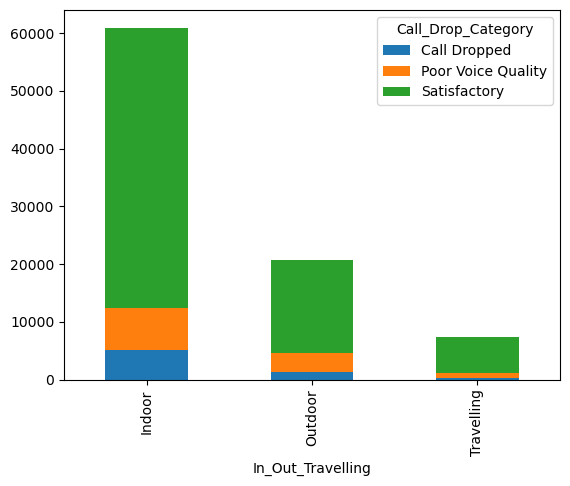

In [189]:
pd.crosstab(final_df_call_qual['In_Out_Travelling'], final_df_call_qual['Call_Drop_Category']).plot(kind='bar', stacked=True)
plt.show()

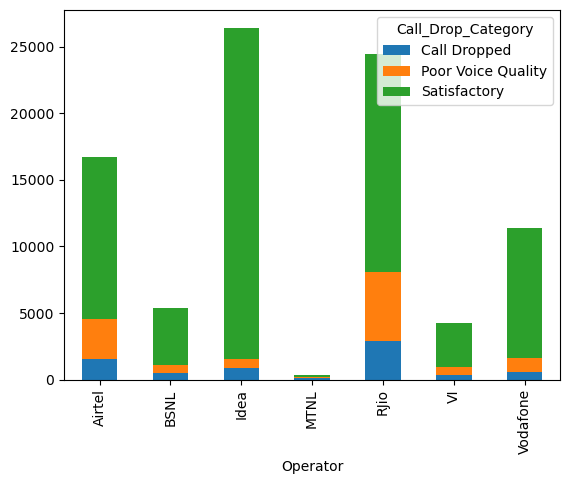

In [190]:
pd.crosstab(final_df_call_qual['Operator'], final_df_call_qual['Call_Drop_Category']).plot(kind='bar', stacked=True)
plt.show()

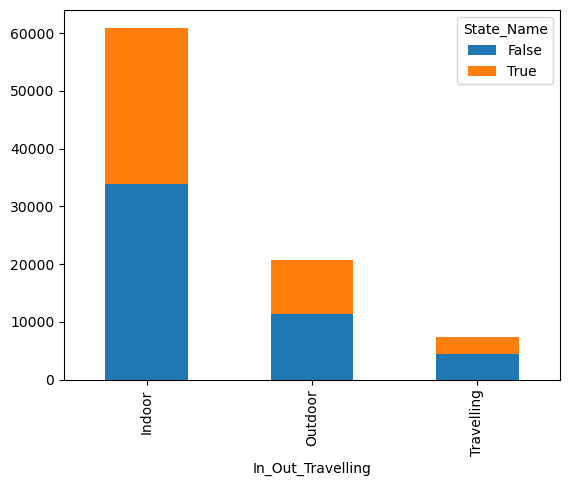

In [216]:
state_5=final_df_call_qual['State_Name'].value_counts().head(5).reset_index()
state_5=pd.DataFrame(state_5)
state_5.columns
ls=state_5['State_Name'].to_list()
ls
df_filt = final_df_call_qual[~final_df_call_qual['State_Name'].isin(ls)]
pd.crosstab(final_df_call_qual['In_Out_Travelling'], final_df_call_qual['State_Name'].isin(ls)).plot(kind='bar', stacked=True)
plt.show()

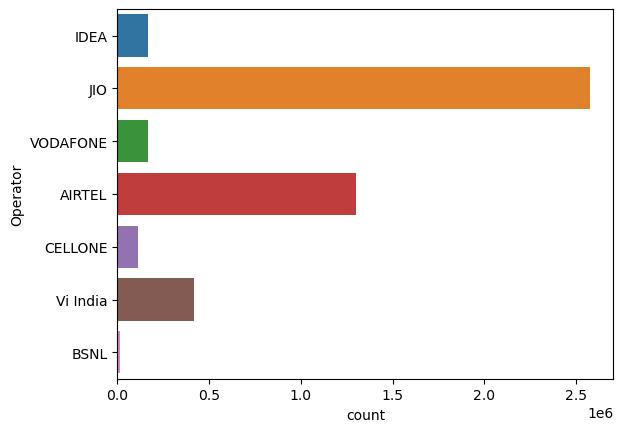

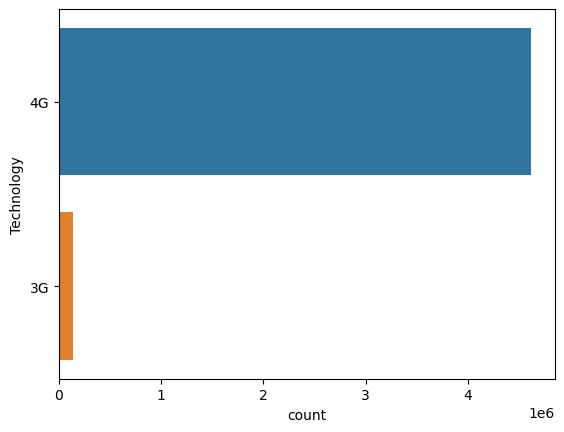

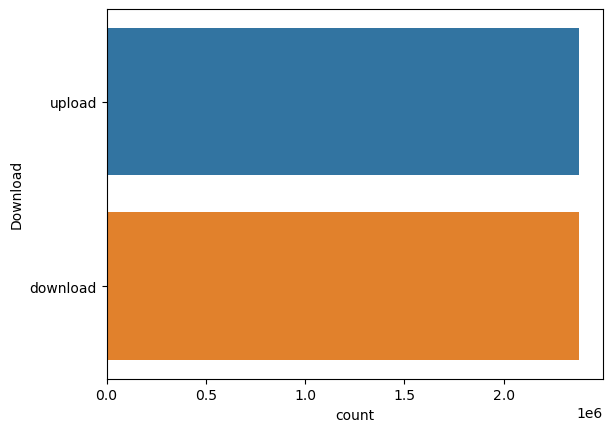

In [98]:
for column in final_df_call_speed.select_dtypes(include='object'):
    if final_df_call_speed[column].nunique() < 10:
        sns.countplot(y=column, data=final_df_call_speed)
        plt.show()

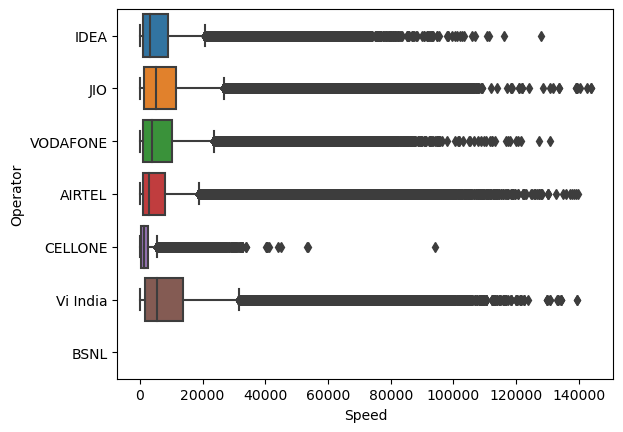

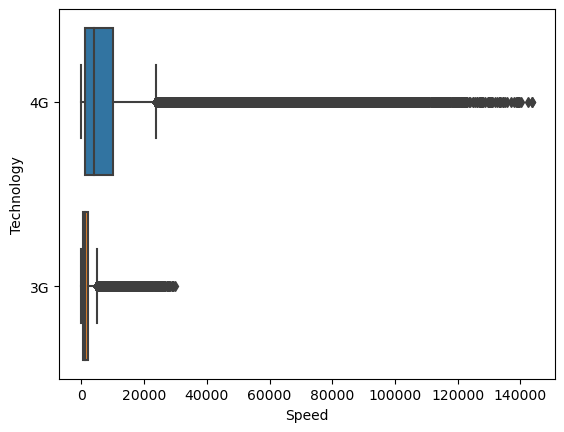

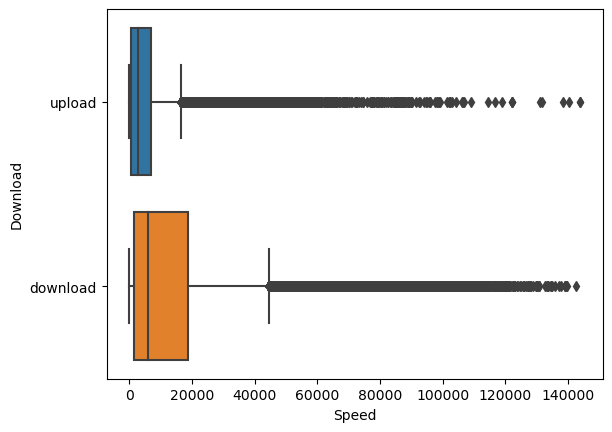

In [110]:
for column in final_df_call_speed.select_dtypes(include='object'):
 if final_df_call_speed[column].nunique() < 10:
     sns.boxplot(y=column, x='Speed', data=final_df_call_speed)
 plt.show()

In [ ]:
sns.swarmplot(data=final_df_call_speed,x="Operator",y="Speed",hue="Technology")
plt.show()

In [138]:
### Modelling for Call Quality

In [180]:
X_dummy = final_df_call_qual.drop(['Call_Drop_Category','Latitude','Longitude'], axis=1)
y = final_df_call_qual['Call_Drop_Category']

## Using Binary encoding for Travelling as it only has 3 features however rest I will be applying One Hot Encoder knowing the risk of preferential treatment
Travelling = pd.DataFrame(X_dummy, columns=['In_Out_Travelling'])

dum_df_1 = pd.get_dummies(Travelling, columns=["In_Out_Travelling"], prefix=["Travel_Type"] )

X_dummy=X_dummy.drop(['In_Out_Travelling'],axis=1)
X_dummy = X_dummy.join(dum_df_1)
X_dummy

X_dummy_2=X_dummy.copy()
X_dummy_2 = X_dummy.astype({'Travel_Type_Indoor': int, 'Travel_Type_Outdoor': int,'Travel_Type_Travelling': int})         # Transform multiple booleans to integer
X_dummy_2

##
labelencoder=LabelEncoder()
X_dummy_2=X_dummy_2.apply(LabelEncoder().fit_transform)
X_dummy_2
X=X_dummy_2.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
kfold = model_selection.KFold(n_splits=10)
X

,Operator,Network_Type,Rating,State_Name,Date,Travel_Type_Indoor,Travel_Type_Outdoor,Travel_Type_Travelling
0,6,1,4,13,0,0,1,0
1,6,1,4,14,0,0,0,1
2,6,0,4,25,0,0,1,0
3,6,1,4,6,0,1,0,0
4,6,1,4,12,0,0,0,1
...,...,...,...,...,...,...,...,...
90442,5,2,3,21,11,0,1,0
90443,5,2,3,16,11,1,0,0
90444,5,2,3,7,11,1,0,0
90445,5,2,4,18,11,1,0,0


In [184]:
## Checking VIF for Independent Variables

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                  feature        VIF
0                Operator   1.003357
1            Network_Type   1.012691
2                  Rating   1.012493
3              State_Name   1.003817
4                    Date   1.001560
5      Travel_Type_Indoor  17.743552
6     Travel_Type_Outdoor   6.382604
7  Travel_Type_Travelling   3.052580


In [181]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sushm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.907694 (0.003477)
KNN: 0.923879 (0.002337)
DTC: 0.926183 (0.001713)
